In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
classes[9]

'truck'

In [ ]:
def plot_sample(X,y,index):

    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

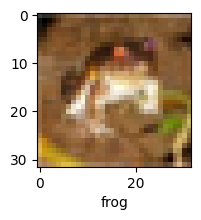

In [ ]:
plot_sample(X_train,y_train,0)

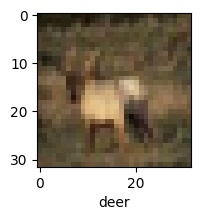

In [ ]:
plot_sample(X_train,y_train,3)

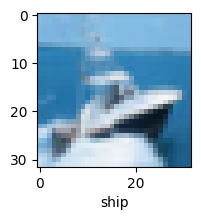

In [ ]:
plot_sample(X_train, y_train,8)

In [ ]:
X_train= X_train/255
X_test=X_test/255

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 164s 105ms/step - accuracy: 0.3042 - loss: 1.9385
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 200s 103ms/step - accuracy: 0.4211 - loss: 1.6406
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 105ms/step - accuracy: 0.4513 - loss: 1.5549
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 109ms/step - accuracy: 0.4760 - loss: 1.4892
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 233s 129ms/step - accuracy: 0.4930 - loss: 1.4393


In [ ]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.4669 - loss: 1.5163


[1.525546908378601, 0.4629000127315521]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.27      0.40      1000
           1       0.75      0.43      0.55      1000
           2       0.29      0.55      0.38      1000
           3       0.33      0.39      0.36      1000
           4       0.53      0.24      0.33      1000
           5       0.42      0.34      0.38      1000
           6       0.47      0.62      0.54      1000
           7       0.45      0.63      0.53      1000
           8       0.54      0.68      0.60      1000
           9       0.61      0.48      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.46     10000
weighted avg       0.51      0.46      0.46     10000



In [ ]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu" , input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64 , kernel_size=(3, 3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
cnn.fit(X_train , y_train , epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 68ms/step - accuracy: 0.3658 - loss: 1.7236
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 70ms/step - accuracy: 0.5846 - loss: 1.1858
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 83ms/step - accuracy: 0.6418 - loss: 1.0234
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 61ms/step - accuracy: 0.6719 - loss: 0.9454
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.6997 - loss: 0.8627
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.7206 - loss: 0.8098
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.7320 - loss: 0.7709
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7472 - loss: 0.7188
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.7578 - loss: 0.6871
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.7742 - loss: 0.6513


In [ ]:
cnn.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6961 - loss: 0.9027


[0.9038188457489014, 0.6933000087738037]

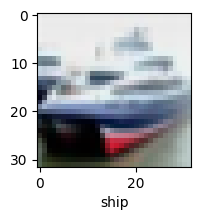

In [ ]:
y_test=y_test.reshape(-1,)
plot_sample(X_test , y_test ,1)

In [ ]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step


array([[4.9476268e-05, 1.5580994e-05, 7.4255111e-04, 8.1226128e-01,
        9.5338444e-05, 1.8653293e-01, 1.7145331e-04, 2.8715313e-05,
        8.8938970e-05, 1.3594600e-05],
       [2.0270883e-03, 1.0458392e-02, 4.8847442e-06, 1.2656041e-07,
        1.7498522e-08, 6.6316680e-08, 6.4672765e-09, 4.3051263e-10,
        9.8650146e-01, 1.0081149e-03],
       [1.6995069e-02, 2.0987633e-01, 4.0119253e-03, 4.7354600e-03,
        4.5722179e-04, 9.0022566e-04, 1.9712388e-04, 7.8683841e-04,
        7.2333550e-01, 3.8704310e-02],
       [4.9039313e-01, 1.4061810e-02, 2.2307493e-02, 4.7743502e-03,
        8.6470006e-04, 2.2828951e-04, 2.6931448e-04, 1.5821517e-05,
        4.6703872e-01, 4.6431389e-05],
       [3.8271637e-06, 1.3047991e-05, 5.7908703e-02, 5.8387700e-02,
        3.5216764e-01, 1.6147254e-02, 5.1529729e-01, 4.5779761e-05,
        2.4451057e-05, 4.2113907e-06]], dtype=float32)

In [ ]:
y_classes= [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

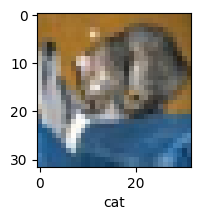

In [ ]:
plot_sample(X_test,y_test,0)

In [ ]:
classes[y_classes[0]]

'cat'

In [ ]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      1000
           1       0.82      0.81      0.82      1000
           2       0.62      0.58      0.60      1000
           3       0.46      0.54      0.50      1000
           4       0.70      0.58      0.64      1000
           5       0.53      0.69      0.60      1000
           6       0.83      0.71      0.76      1000
           7       0.76      0.72      0.74      1000
           8       0.78      0.83      0.80      1000
           9       0.87      0.69      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.70     10000
weighted avg       0.71      0.69      0.70     10000

